# universality

- Universal Approximation Theorem [Cybenko, 1989]: A neural network with one hidden layer containing a **sufficient but finite number of neurons** can **approximate** any **continuous** function to a reasonable accuracy, under certain conditions for activation functions (namely, that they must be sigmoid-like).

    Note:

    - NN can't exactly compute any function, can only approximate

    - only guarantee this accuracy for continous function, but a continous approximation of discontinuous function is good enough

    - don't mean we can build such NN easily

    - SGD may not learn such function easily after build such NN 


- since a single layer NN with enough neurons is universal to approximate any function, why use deep NN?

    deep NN can reduce number of neurons by pruning, which is best architecture in practice.

- Two layered logic functions can compute any logic given the right logic gate set (i.e. non-linear activation)

# generalization

- generalization: ability of model to perform well on unseen data

- **good generalization = large capacity + good inductive bias/regularization**

- inductive bias 

    - regularization is a kind of inductive bias: encourage **simple** model. helps model generalize but don't reduce capacity

    - **Occam’s razor: The simplest explanation compatible with the observations should be preferred**

    - generalization depends on how well **inductive bias** captures reality

## double descent risk curve

- classical risk curve: U-shape, arise from bias-variance trade-off

- double descent risk curve: incorporate classic regime with modern interpolating regime, separated by interpolation threshold. predictors to the right of threshold have 0 training error and low test error.

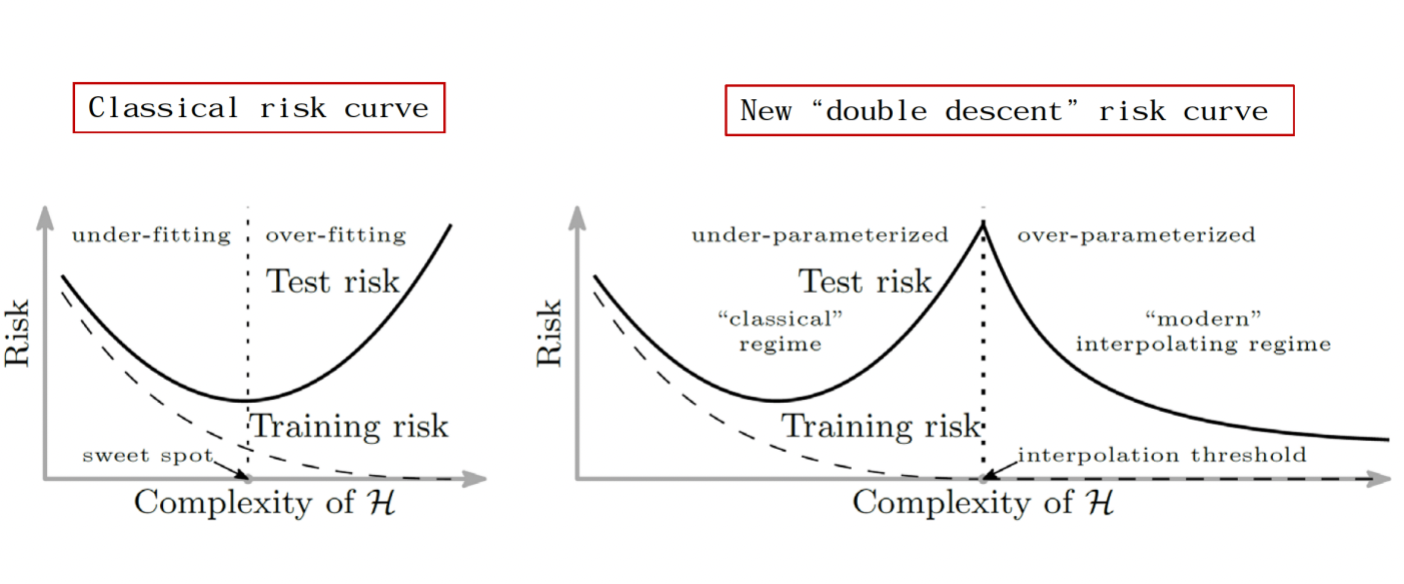

## type of fitness

- generalization gap = test error - training error

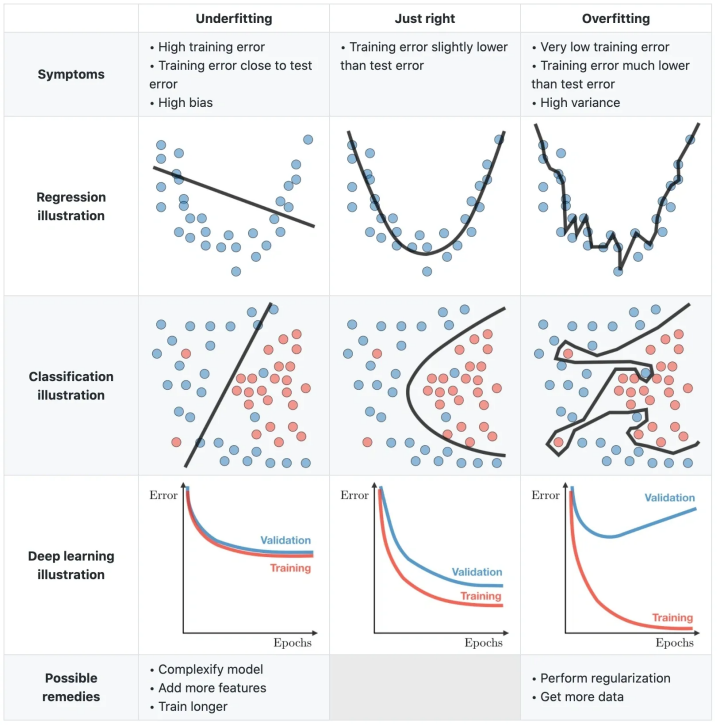

## classic generalization error bound

$c$ is model complexity, can be many measures

$$
\underbrace{E(L(\hat y, y))}_{\text{Expcted risk}}  \leq \underbrace{\frac{1}{n}\sum_{i=1}^n L(f(x_i), y_i)}_{\text{Empirical risk}} + \underbrace{O\left(\sqrt{\frac{c}{n}}\right)}_{\text{Model complexity}}
$$

# complexity

- alias: capacity, complexity, flexibility, expressness, richness

- complexity is ability of model to fit **training** data

    determines how well the model generalize

- Complexity has many measures

    - number of parameters in the model

    - Rademacher complexity
    
    - VC dimension

    - weight norm

## Rademacher complexity

Rademacher complexity captures the ability of functions in a function class $\mathcal{H}$ w.r.t a training set $S$ to fit random labels $\xi$ which increases with the complexity of the class.

$$
R_S(\mathcal{H}) = \frac{1}{n} \underset{\xi \sim \left\{\pm 1\right\}^n}{E} \sup_{f \in \mathcal{H}} \sum_{i=1}^n \xi_i f(x_i)
$$



## VC Dimension

The VC dimension of a model $f$ is maximum number of points that can be shattered by $f$ 

\begin{equation*}
\mathrm{VCdim}(\mathcal{F}) = \max \left\{d : \exists\text{ a set of } d \text{ points  can be shattered by } \mathcal{F}\right\}
\end{equation*}

- $\mathrm{VCdim}(f) = 0$

$$
f = c
$$

- $\mathrm{VCdim}(f) = 1$

$$
f_{\theta}(x)=\left\{\begin{matrix}
1 &  \text{if } x > \theta \\
0 &  \text{if } x \leq \theta \\
\end{matrix}\right.
$$


- $\mathrm{VCdim}(f) = 2$

$$
f_{\theta}(x)=\left\{\begin{matrix}
1 &  \text{if } x \in [\theta, \theta + 4] \\
0 &  \text{otherwise} \\
\end{matrix}\right.
$$

- $\mathrm{VCdim}(f) = 3$

$$
f_{w, b}(x)=w x+b
$$


- $\mathrm{VCdim}(f) = \infty$

$$
f_{\theta}(x)=\left\{\begin{matrix}
1 &  \text{if } \sin(\theta x) > 0 \\
0 &  \text{otherwise} \\
\end{matrix}\right.
$$

## norm-based complexity

[Towards Understanding the Role of Over-Parametrization in Generalization of Neural Networks](https://arxiv.org/pdf/1805.12076.pdf)

capacity of function $f(x)=V[Ux]$ is overall Frobenious norm of weight matrix

$$
||W||_{tr} = \min_{W=VU^T} \frac{1}{2}(||U||_F^2+||V||_F^2)
$$

input $x \in \mathbb{R}^{d}$, weight matrix $U \in \mathbb{R}^{h \times d},  V \in \mathbb{R}^{c \times h}$

- distance Frobenius norm measured w.r.t. initialization decreases as increase number of hidden units in a hidden layer 

$$
||U-U_0||_F
$$

- for a large NN, inductive bias encourages **low-norm** model, weights of low-norm initialized hidden units are only small step away from the initial weights.



### low-rank vs. low-norm approximation/factorization

- low-rank approximation: non-convex, local minima are abundant, constraint is number of hidden units (low dim)

- low-norm approximation: trace-norm is convex, if dim is high enough and norm is regularized, guranteed to find a global minima

# over-parameterized model

- over-parameterized: more parameters than necessary to represent the target function

    number of parameters = training data size

## Examples of over-parameterized model


- Deep neural networks: typically have many layers and a large number of neurons in each layer.

- Support vector machines: a type of kernel-based learning algorithm that can be over-parameterized by using a high-dimensional feature space or a large number of support vectors.

- Decision trees: over-parameterized by allowing them to have a large number of nodes or branches.

- Random forests: over-parameterized by using a large number of trees or allowing each tree to have a large number of nodes or branches.

- Kernel regression models: over-parameterized by using a large number of basis functions or a high-dimensional feature space.

## memorize vs. generalize


- capacity of large NN is enough to memorize the entire dataset, but it choose to generalize, why?

    inductive bias: SGD and norm-based regularizations find smooth functions that fit the data

    NN can generalize when data and labels are meaningful

    NN memorize if data and labels don't match, e.g., data are noise or labels are random

- SGD on random data is slower than real data bc reduce loss on current input may not reduce loss on future input

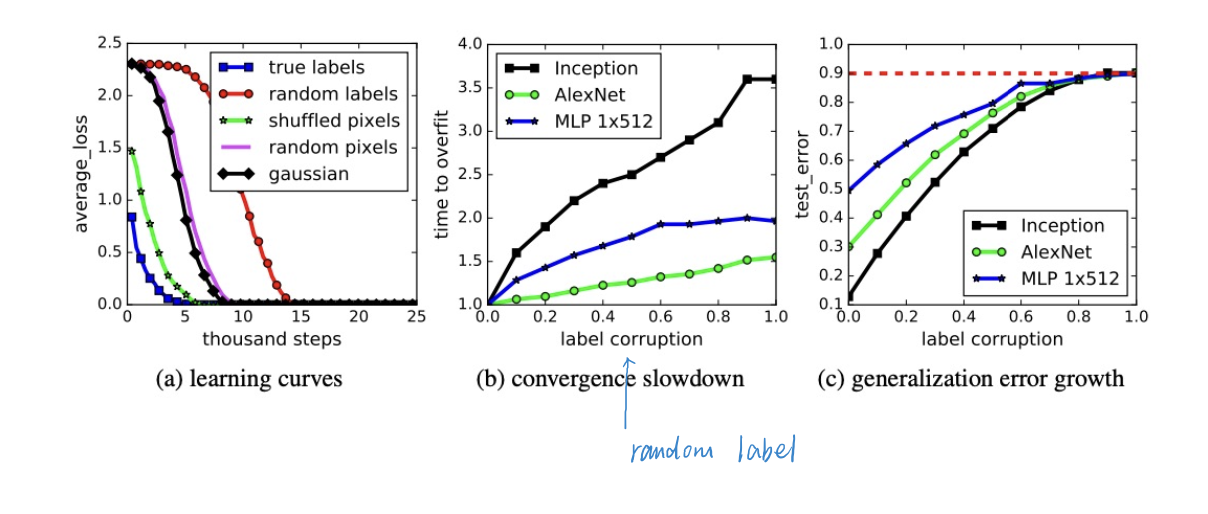

difference between memorization and interpolation is **smoothness**

the larger capacity, the more parameters, the more candidate predictors compatible with data, the **smoother** interpolating function, the smaller norm, the simpler model.

Example

- polynomial regression of degree 1000 have small coefficients

- neural tangent kernel is infinitely wide NN

- Neural ODE is infinitely deep NN 



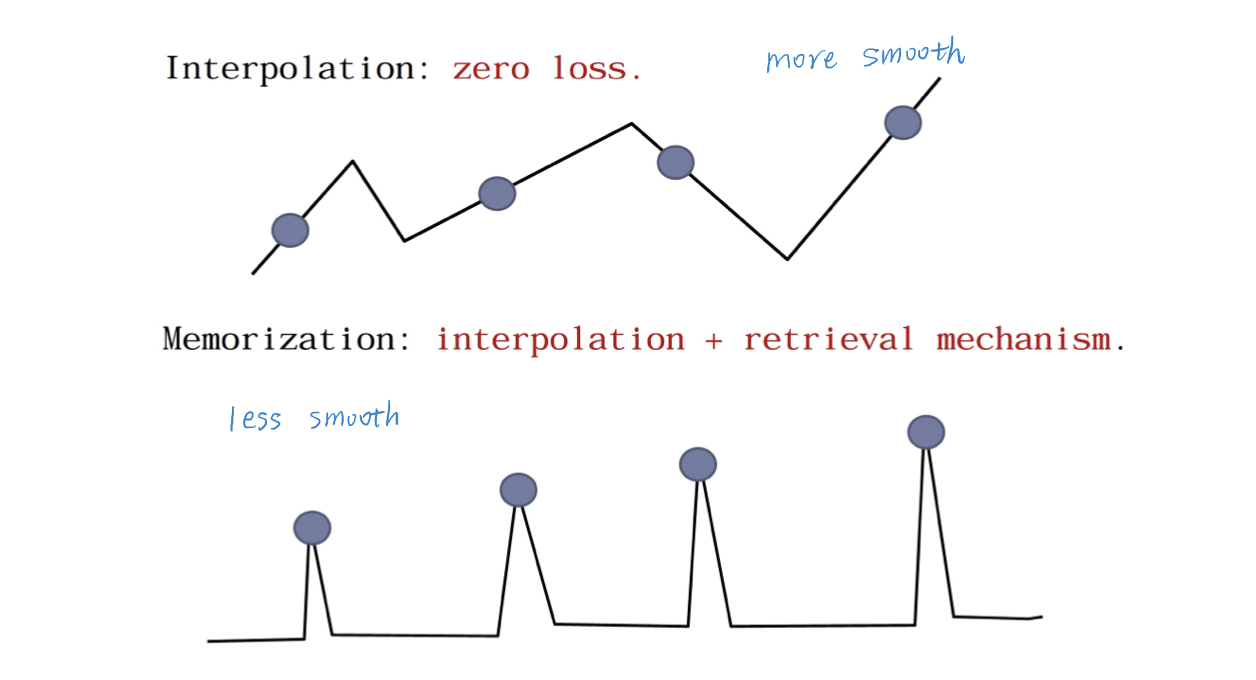


# stability

- stability: A randomized algorithm A is uniformly stable if for all data sets differing in only one data point, the learned models produce nearly the **same** predictions

- theorem: uniform stability implies generalization in expectation

## SGD is stable

[Train faster, generalize better: stability of stochastic gradient descent [Hardt et al, 2016]](https://arxiv.org/pdf/1509.01240.pdf)

- SGD with a suitable choice of learning rate and regularization can converge to the global minimum of the objective function with high probability, 

    lead to stable models that generalize well to unseen data, even in the presence of noisy or adversarial examples.

- property: halving the step size roughly halves the generalization error

## coherent gradient

[ICLR 2020 Coherent Gradients: An approach to understanding generalization in gradient descent-based optimization](https://arxiv.org/abs/2002.10657)

- coherent gradients: gradients that share a common direction in parameter space. 

- coherent gradients are important for generalization because they represent a smooth and stable trajectory of the optimization process that is less likely to overfit to the training data.

- gradient descent is implicit regularization: parameter updates are biased to coherent gradients of most examples (signals rather than data)

## gradient clipping

- gradient clipping: clip outliers of gradients in a batch data

    a technique help generalize and prevent **gradient exploding**

    outlier is defined as norm of gradient is too small or too large in a threshold